# **Binarization and Coin Counting Exercise**

# Objective

The objective of this Computer Exercise is to illustrate the process of binarization of an image, to find efficient methods to select the best threshold automatically (Otsu) and later to use some morphological filters that allow us to obtain simple and robust results, that is, results that are kept independent of the capture, lighting, noise conditions of the image, etc. As an example of this type of analysis we will develop a script in Python that allows us to count the number of coins that appear in a photograph. Our goal will simply be to count the number of coins and not their value, but the student may wish to extend the concepts developed in practice to improve the system and analyze the values according to their relative sizes & colors.







#**Important**
To deliver the exercise print this Notebook in PDF format.

**DO NOT DELIVER THE *.IPYNB FORMAT**

#Preparing Your Drive Directory for being processed by Colab

Working in Google Colab is very easy. Colab is a web environment for executing Python which is specially dedicated to computer vision and artificial intelligence. You can test your programs in the web without installing Python or any other libraries in your computer. The environment is though for interactive development of algorithms and learning AI and Computer Vision. Google also provides access to powerful GPU K80 Tesla where you can test your programs.
In order to execute Colab you need to run Jupyter Notebooks (like this one), that combine text with code. You also have to upload all your files to Google Drive. The system will not work with your local files. (It has a mode for working with local files but in this case the execution of the code is also performed locally).
So, you will need to upload this ipynb to your drive and enter to the link colab.research.google.com where you will find the details for execution.

First step You will have to upload your files to your drive. In the next cell we mount the drive to have access to it from google.colab
Please follow the instructions

In [32]:
# Mounting your drive to be used by Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Uploading the test image and conditioning

The first part of the exercise is to load an example image. The image is in color and what we will do is to pass it to gray levels. The resolution of the image is also very high so it is usually convenient to reduce it to control the computational cost of the algorithms. In practice, the resolution of the images should be sufficient to ensure that the analysis algorithms work correctly. If so, it is not necessary to use higher resolutions that would only contribute to increase the computational load.

To load the image and visualize it, we will place it in the directory in which we have downloaded the computer exercise assignment, along with the images to be analyzed and we will perform the instructions described in the next cell (remember to execute the cell using MAJ+ENTER).

In [33]:
# We begin changing the directory.
# You will have to define the directory where you have uploaded your images.
# In my case it is in 'Image Computer Exercises'.
# The rest of the code opens the image, converts it to gray levels and represents it.
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CE1")

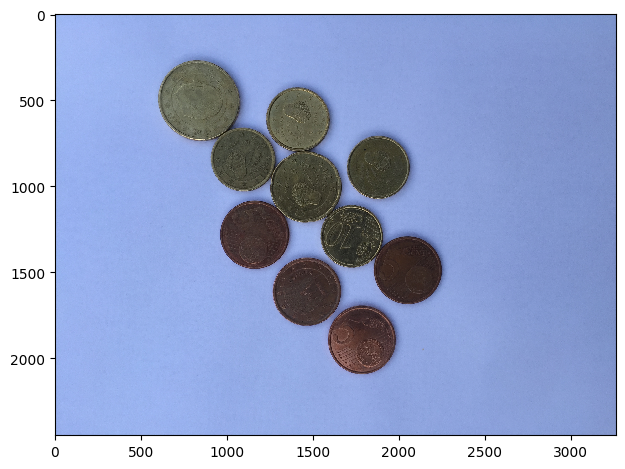

In [34]:
from skimage import io
img = io.imread('Monedas1.JPG') # Be careful when openning a file .. It is case sensitive
io.imshow(img)
io.show()

With these instructions we will visualize the image. We are importing the submodule io (input output) from the library scikit-image (a package for image processing) and using the sentence imshow (the sentence show() especifies to show the graphics and may not be necessary in some implementations of Python)

We also could check that it is a color image and also that its size is quite large (the number of pixels are indicated in the image axis).

It is possible to determine the size of the image executing the following instruction


In [35]:
print(img.shape)

(2448, 3264, 3)



#**Question 1.**
Determine the size of the current image GIVING THE NUMBER OF ROWS, COLUMNS AND COLORS (we are using the instruction shape from the scikit-image python library. In the next instructions of the exercise it will be useful for you to search the documentation of this library to understand what the different examples sentences are doing)



**Answer.**



Rows: 2448
Columns: 3264
Colors: 3



### Resizing the image

To change the size of the image we will execute the following sentence (we also are importing the submodule of scikit-image for image transformations)


In [36]:
from skimage import transform as tf
#
img = tf.rescale(img,0.25, channel_axis=-1)
print(img.shape)

(612, 816, 3)



# Question 2.
Now, what is the new size of the image? What does the instruction rescale? What instruction would you run if you want the final image to have half the rows and columns of the original image? </span>


**Answer.**

Rows: 612, Columns: 816 and colors: 3 </span>

The rescale function in skimage scales the rows and columns of an image by a given factor. It applies interpolation to increase or reduce the size of the image. In this case, rescale(img, 0.25) scales down the image by 25%, reducing both the rows and columns to 25% of their original values. </span>

If I want half the rows and columns, I will run tf.rescale(img, 0.5) instruction.



#**Question 3. **
Determine what are the color components of the pixel in row 225 and column 150 of the image u that you now have now in memory. Given its value, could you tell if it is a pixel corresponding to the background of the image or a coin?

**Answer.**

**The Blue channel has the highest value. So this is likely the background, not a coin**


In [37]:
pixel_value = img[225, 150]
print(f"Pixel value at (225, 150): {pixel_value}")

Pixel value at (225, 150): [0.59321673 0.68145203 0.92655007]


### Converting the image to gray levels

Now we will execute the following sentences to convert the image to gray levels. The first one is just importing the library for color transforms and the second performs conversion from color to luminance, having into account modern phosphor conventions


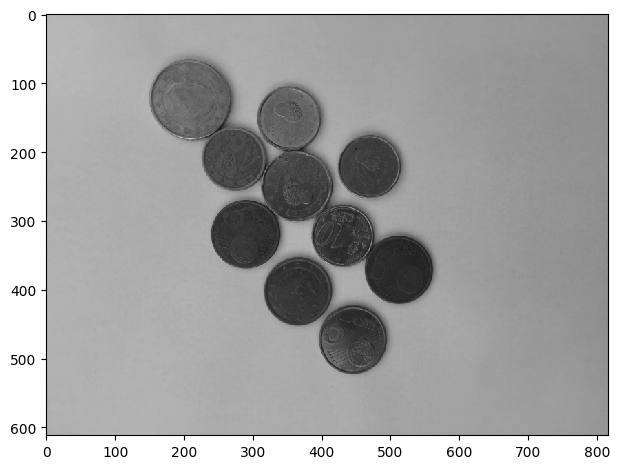

In [38]:
from skimage import color as cl

img_g = cl.rgb2gray(img)
io.imshow(img_g)


#**Question 4.**

Visualize the image img_g and discuss the differences with the original image img. Explain which transformation performs the rgb2gray function. Explain how every color is weighted in the final estimation of luminance. Determine the new size of the image. Indicate the value of the pixel in row 225 and column 150 and explains if it is consistent with the value of the pixel obtained in question 3.

**Answer.**

Differences-The color channel is reduced to 1 only, from 3 channels.</span>

The transformation is got from the weighting of the colors: </span>

0.3xRed + 0.59xGreen + 0.11xBlue </span>

New size of the image is the same as the earlier, (612,816). But the color axis is showing nothing as it is greyscaled. </span>

The value of the pixel at(225,150) is 0.6803735976709384. It shows one component so it is not consistent with the one from question 3.


In [39]:
print(img.shape)
print(img_g.shape)

(612, 816, 3)
(612, 816)


In [40]:
pixel_value = img_g[225, 150]
print(f"Pixel value at (225, 150): {pixel_value}")

Pixel value at (225, 150): 0.6803735976709384


### Image Thresholding

The next step is image thresholding and conversion to two levels: black and white. To do this, it is necessary to determine the binarization threshold. To determine the binarization threshold, it is often useful to analyze the histogram of the image. The next sequence of instructions will show the histogram of the image.

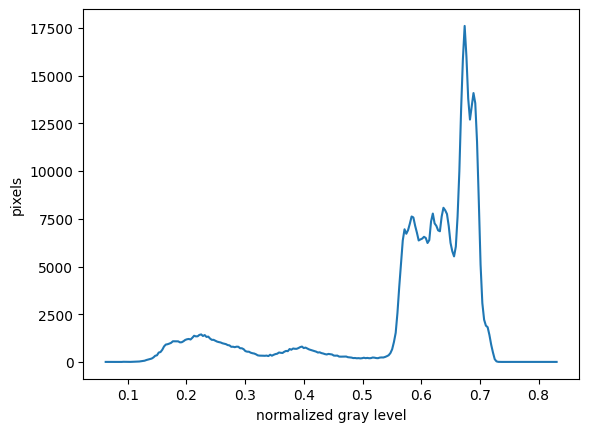

In [41]:
from skimage import exposure as iml #importing scikit-image submodule to compute histograms
import matplotlib.pyplot as plt     #importing libraries for ploting

hist, bins= iml.histogram(img_g)

plt.xlabel('normalized gray level')
plt.ylabel('pixels')
plt.plot(bins,hist)
plt.show()

# **Question 5.**
Taking into account the graph shown by the above instruction, select the level of the binarization threshold that you consider appropriate.

**Answer.**

**Threshold=0.5**


The binarization threshold proposed in the previous question will be assigned to the threshold variable and we will perform the conversion of the image to a black and white image.

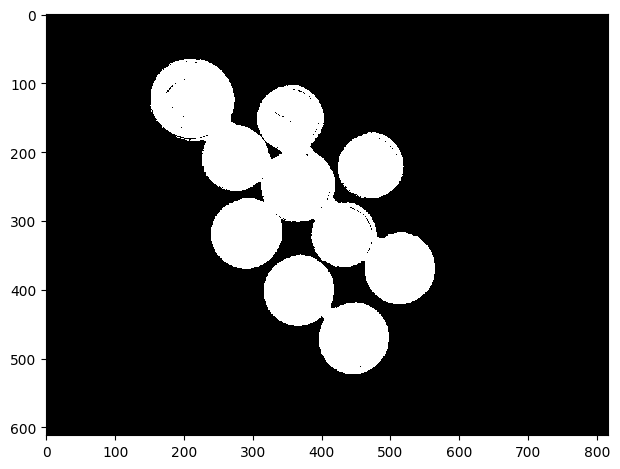

In [42]:
th1= 0.5 # Change this line by your binarization threshold,
         # 0 <= th1 <= 1, the example is set to 0.2 but should be changed
img_b = (img_g <= th1).astype(float)

io.imshow(img_b)
io.show()

# **Question 6.**
Observe the result obtained and discuss it. Have you been able to get an appropriate threshold value on the first test? Or has it been necessary to carry out a threshold adjustment process from the observed results?

**Answer.**

As I could see the coins segmented from the background, 0.5 seems a good threshold value. After several checks, I am keeping 0.5.



## Automatic computation of the threshold: Otsu method

To verify the quality of automatic threshold selection systems we can use the Otsu method. This method is an improvement of the K-Means method that takes into account not only the average value of each of the two classes but also the variance. scikit-image implements the Otsu method and proposes an automatic threshold for binarization. Execute the following statement to automatically calculate the optimal threshold with the Otsu method:

In [43]:
from skimage import filters as ft #importing submodule for implementing otsu threshold calculation

th2 = ft.threshold_otsu(img_g)
img_b2 = (img_g <= th2).astype(float)

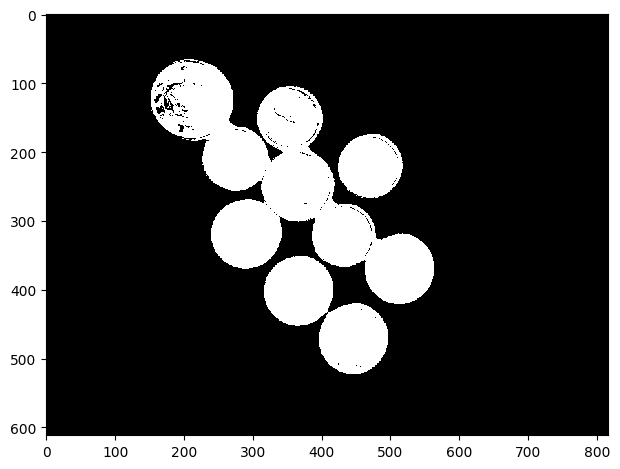

In [44]:
io.imshow(img_b2)
io.show()

In [45]:
print(th2)

0.4570533887611108


# **Question 7**.
Compare the value obtained by Otsu with the threshold value that you proposed in question 6. Represent the binarized image with this threshold value and checks if it is close to what was expected.

**Answer.**

My proposed value was 0.5, where Otsu method gives 0.4571. It was fairly close.
</span>

# Morphological filtering

After binarization, noise may appear in the form of white pixels in regions that should have black pixels and vice-versa. To eliminate this noise morphological filters of erosion and dilation are often used. In order to count coins efficiently using labeling methods, our interest would be that each of the objects that appear on the screen after binarization and filtering were disconnected, ie a set of connected pixels for each coin but not-connected for different coins. To achieve these goals, we must select the sizes of structuring elements correctly.

The following sequence of instructions defines two structuring elements with a circular shape and a radius equal to unity. You must modify the radius r1 and r2 until you get an image where the different coins appear correctly segmented (that is compact but correctly separated). Execute the instruction sequence by modifying the values of r1 and r2 until the desired results are obtained.

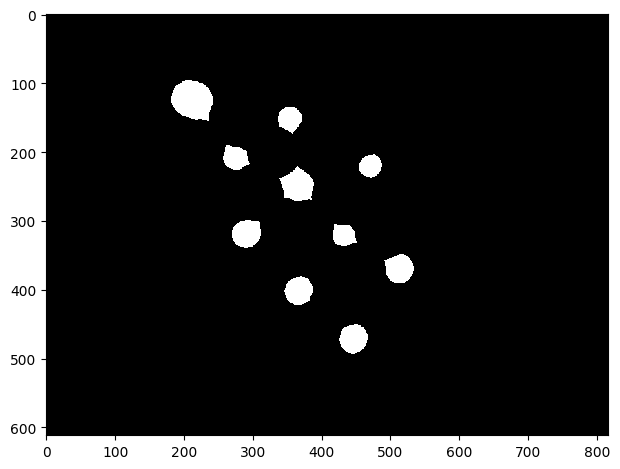

In [46]:
# Morphological Filtering: Dilation and Erosion

from skimage import morphology as morph
r1 = 5
r2 = 35
se_dilate = morph.disk(r1)
se_erode = morph.disk(r2)

r = morph.binary_dilation(img_b2, se_dilate)
t = morph.binary_erosion(r,se_erode).astype(float)

io.imshow(t)
io.show()

# **Question 8.**
Write the values of r1 and r2 that you considered to be the best.

**Answer.**

**r1=5,**
**r2=35**


### Labelling and Counting Coins

Finally, to perform the labeling and counting of elements of the binary image we can use the instruction label that returns a labeled image and the number of objects in the image. The following sequence of instructions also provides an algorithm that converts every number in the labeled image to a different color, to help verification of the quality in the segmentation (all the coins should have different colors).

10
10


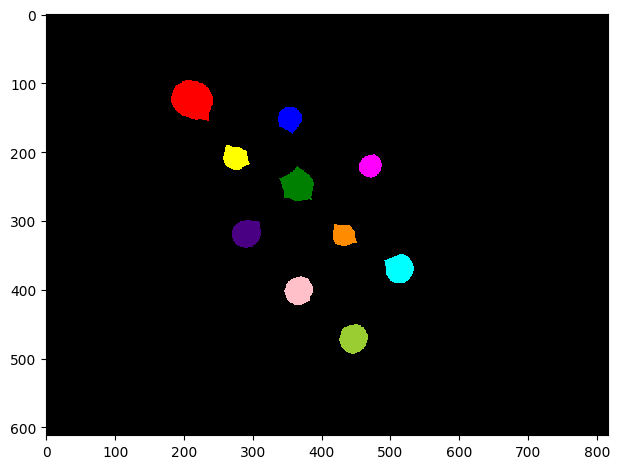

In [47]:
# Labelling and Counting the number of coins

img_labeled, num_coins = morph.label(t, return_num = True)
print(num_coins)
print(img_labeled.max())

imgcolor = cl.label2rgb(img_labeled,bg_label=0)

io.imshow(imgcolor)
io.show()

# **Question 9.**
Modify, if necessary, the different filtering parameters (r1 and r2) until you get a correct result and the number of coins entered is correct. Provide the selected r1 and r2 values again.

**Answer.**

**r1=5,**
**r2=35**

# **Final Exercise**

For the next exercise, you can group the different instructions executed for finding the number of coins in our example. You can use these instructions as a program for the next exercise, modifying those parameters that you consider necessary.

##**Part 1.**
Take a set of coins, spread them on a table and take a picture with the mobile (try not to overlap the coins so that the counting is correct, although they may be in contact). Determine the number of coins in the photo using the previous program and change the parameters if necessary. Provide, as a result of the exercise, the original image (in color) and the final image with the different colors assigned to each object that we get after labeling them and the final code used for counting the number of coins

#**Part 2.**

Define a method that you could use to count the different types of coins. To simplify you may suppose that you only have 2€, 1€, 50 cent, 20 cent, 10 cent and 5 cent coins. Have into account the possible scale variations, depending on the distance that the images are taken (scale invariance), the color of the coins, the relative sizes, etc. **You just have to describe the algorithm 'conceptually', without implementing the code**. The implementation of the code is optional and it is not trivial to get a robust code to solve the problem. I only recommend to implement part 3 if you are highly motivated and have time!

#**Part 3. (Optional)**

Write a software in Python implementing the counting. Provide the software code and some images to test it.



# Part 1

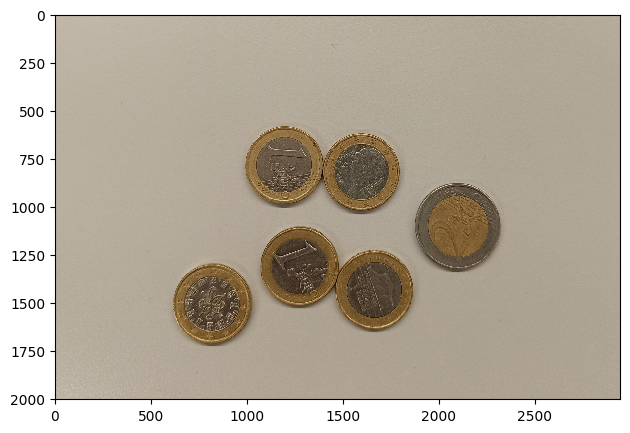

In [48]:
img = io.imread('test.jpg')
io.imshow(img)
io.show()

In [49]:
img = tf.rescale(img,0.25, channel_axis=-1)
print(img.shape)

(501, 736, 3)


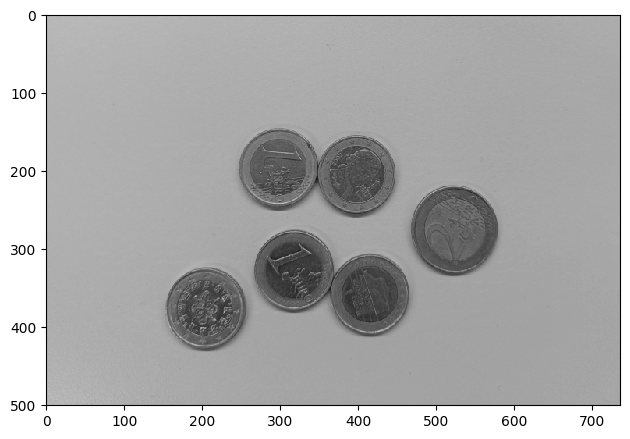

In [50]:
img_g = cl.rgb2gray(img)
io.imshow(img_g)

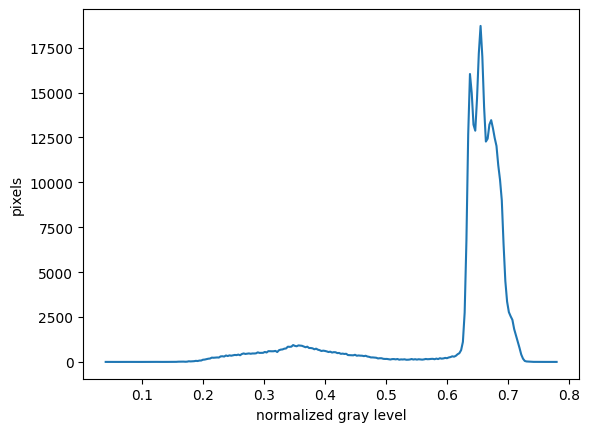

In [51]:
hist, bins= iml.histogram(img_g)

plt.xlabel('normalized gray level')
plt.ylabel('pixels')
plt.plot(bins,hist)
plt.show()

0.5046168607605289


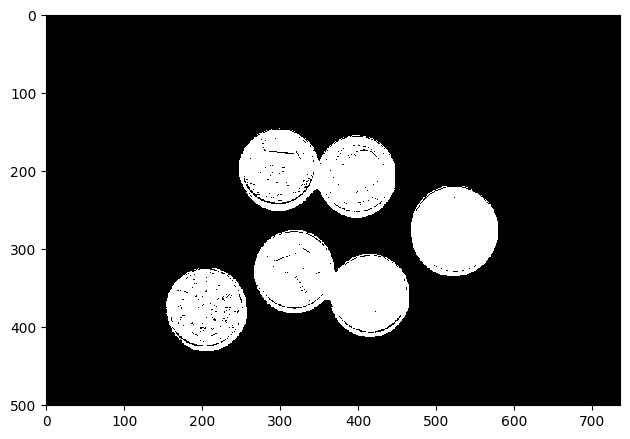

In [52]:
th2 = ft.threshold_otsu(img_g)
img_b2 = (img_g <= th2).astype(float)
print(th2)
io.imshow(img_b2)
io.show()

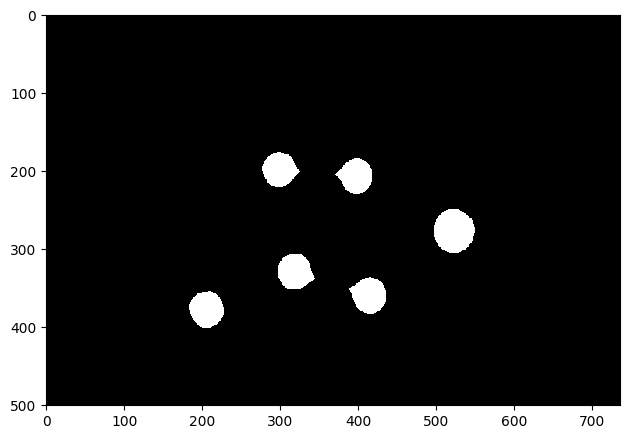

In [53]:
r1 = 5
r2 = 35
se_dilate = morph.disk(r1)
se_erode = morph.disk(r2)

r = morph.binary_dilation(img_b2, se_dilate)
t = morph.binary_erosion(r,se_erode).astype(float)

io.imshow(t)
io.show()

6
6


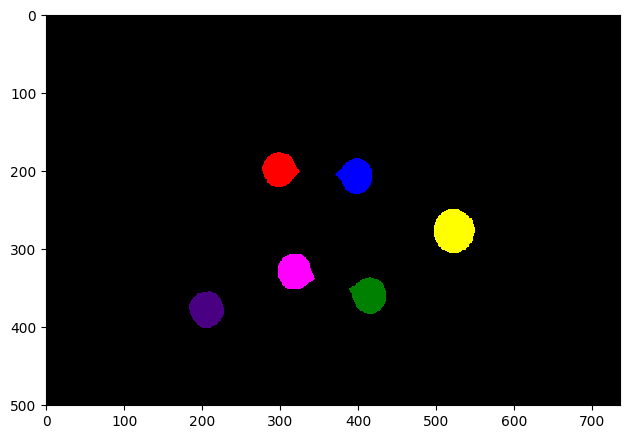

In [54]:
img_labeled, num_coins = morph.label(t, return_num = True)
print(num_coins)
print(img_labeled.max())

imgcolor = cl.label2rgb(img_labeled,bg_label=0)

io.imshow(imgcolor)
io.show()

# Part-2

## Preprocessing:
- Grayscale Conversion: Need to convert the image to grayscale.

## Segmentation:
- Thresholding (e.g., Otsu's method) to binarize the image.

## Morphological Operations:
- Apply morphological operations (dilation followed by erosion) to close gaps between coin edges.

## Feature Extraction:
- Shape Descriptors: For each coin, we calculate shape descriptors such as:
  - Area (size of the coin)
  - Perimeter
  - Circularity (to help distinguish between coins based on their shape)
- Scale Normalization: Since coins may appear differently based on distance from the camera, normalize these features against known coin dimensions or use a reference coin for scale comparison.

## Classification:
- Machine Learning Model: Train a classification model (e.g., k-NN, SVM, or a simple neural network) using the extracted features. This model would learn to classify coins based on their area, perimeter, and other shape descriptors.

## Count Coins:
- Maintaining a data type to count coints.



# Part-3

In [55]:
import cv2

# Loading the image
img = cv2.imread('test.jpg')

# Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Applying SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
					kp ,
					img ,
					flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('image-with-keypoints.jpg', img)


True

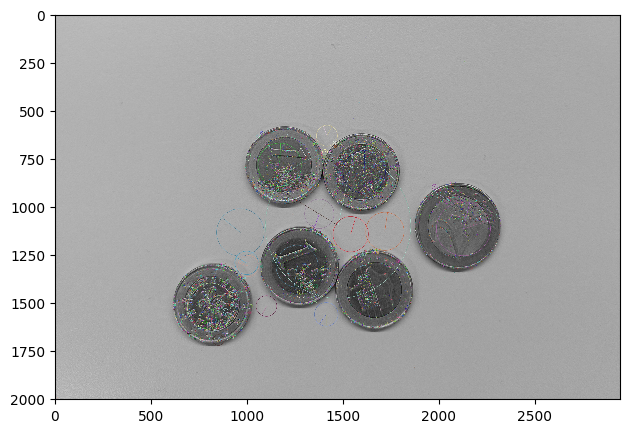

In [56]:
io.imshow('image-with-keypoints.jpg')
io.show()